# Actividad - Estadística básica

* **Nombre:** Manuel Villalpando Linares
* **Matrícula:** A01352033

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [1]:
# Carga las librerías necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [2]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

## Análisis estadístico
1. Carga la tabla de datos y haz un análisis estadístico de las variables.
* Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.
* Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.
* Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?
* Calcula la correlación de las variables que consideres relevantes.

In [6]:
# Escribe el código necesario para realizar el análisis estadístico descrito 
# anteriorment.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Analisis de variables:

***Name:*** Nombre de libro, string. <br>
***Author:*** Nombre del autor del libto, tipo string <br>
***User Rating:*** Calificacion promedio del libro, flotante, rango[1-5], min: 3.3, max: 4.9 <br>
***Reviews:*** Número de reseñas del libro, entero, rango[37-87841], min: 37, max: 87841 <br>
***Price:*** Precio del libro, flotante, rango[10.8-105], min: 10.8, max: 105 <br>
***Year:*** Año de publicación, entero, rango[2009-2019] min: 2009, max: 2019 <br>
***Genre:*** Género literario, string, rango[fiction-nonFiction] <br>

Conclusiones basadas en media, mediana y desviacion estandar:

Observando detenidamente la relacion que existe en estas tres variables, podemos llegar a la conclusion de que los libros del 2014 son los mejores ya que por lo general, existen más libros escritos en este año, los cuales además de esto, generan que la calificacion promedio de los libros sea muy buena. El 2014 fue un excelente año para los libros ya que añadido a la buena calificacion, el precio de los libros no es muy elevado.

En cuanto a la desviacion estandar, el unico valor que provoca que esta se salga más del rango es el std de las reseñas, ya que llega a valores mucho más altos que cualquier otro apartado con las std.

In [13]:
#Correlacion de variables relevantes.
relevantes = pd.read_csv('bestsellers with categories.csv', usecols=['Reviews', 'Price'])
relevantes.corr()

,Reviews,Price
Reviews,1.000000,-0.109182
Price,-0.109182,1.000000


¿Cuáles son las variables relevantes e irrelevantes para el análisis?

Considero que las variables más relevantes deben ser cuantitativas, ya que serán las que en un futuro nos podrían ayudar a determinar alguna información más importante con exactitud. Como podría ser el caso contrario en el caso de las cualitativas, las cuales si bien son utiles para saber informacion como tal de los datos, sin embargo no siempre son tan utiles para calcular y hacer predicciones a futuro por ejemplo.

## Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:
* ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
No, a mi parecer todas las variables sirven aunque sea para filtrar por informacion deseada
* ¿Existen variables que tengan datos extraños?
Hay un libro gratis, a menos que lo regalen todo correcto :)
* Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
Estan en rangos diferentes la mayor parte de ellas acorde a las necesidades del usuario. No creo que afecte ya que muchas veces se necesita adaptar las variables para trabajar más comodo
* ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?
Unicamente user rating y reviews

Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:
* 1 gráfico de caja (boxplot)
* 1 mapa de calor
* 1 gráfico de dispersión
   
Describe brevemente las conclusiones que se pueden obtener con las gráficas.

** Escribe tus conclusiones **

## Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.
* Determina un valor de $k$
* Calcula los centros de los grupos resultantes del algoritmo k-means

Basado en los centros responde las siguientes preguntas
- ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
- ¿Cómo obtuviste el valor de $k$ a usar?
- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
- ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
- ¿Qué puedes decir de los datos basándose en los centros?

In [15]:
# Implementa el algoritmo de kmeans y justifica la elección del número de 
# clusters. Usa las variables numéricas.

# normalizacion de variables para evitar problemas con rangos
numeric_cols = ['User Rating', 'Reviews',	'Price']
X = df.loc[:, numeric_cols]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head()

,User Rating,Reviews,Price
0,0.359990,0.460453,-0.470810
1,-0.080978,-0.844786,0.821609
2,0.359990,0.599440,0.175400
3,0.359990,0.808050,-0.655441
4,0.800958,-0.365880,-0.101547


Text(0.5, 1.0, 'Silhouette Score')

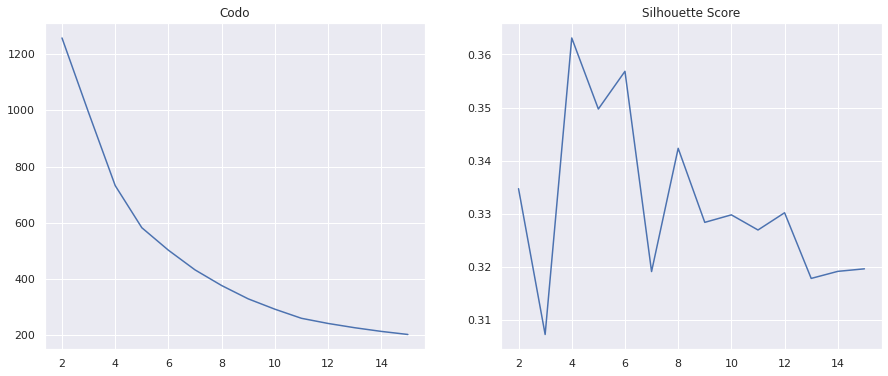

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(grupos, wcss)
axs[0].set_title('Codo')

axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

In [19]:
model = KMeans(n_clusters=4, random_state=47)
clusters = model.fit_predict(X_norm)

# Agregamos los clusters a nuestros DATOS ORIGINALES
relevantes['Grupo'] = clusters.astype('str')
relevantes.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Reviews,Price,Grupo
0,17350,8,0
1,2052,22,2
2,18979,15,0
3,21424,6,0
4,7665,12,2


Analiza las características de cada grupo. ¿Qué nombre le pondrías a cada segmento?



* Grupo 0 Libros muy baratos y muy buenos

* Grupo 1 Libros Baratos y entretenidos

* Grupo 2 Libros baratos y muy buenos

* Grupo 3 Libros caros y entretenidos



** Escribe la respuesta **

In [20]:
# Haz un análisis por grupo para determinar las características que los hace 
# únicos. Ten en cuenta todas las variables numéricas.
relevantes.groupby('Grupo').mean()

,Reviews,Price
Grupo,,
0,27444.646154,9.084615
1,8631.666667,12.416667
2,6753.977419,11.900000
3,7219.538462,49.692308


In [21]:
relevantes.groupby('Grupo').std()

,Reviews,Price
Grupo,,
0,12779.526505,3.833825
1,9097.337152,5.013736
2,4145.890023,6.819423
3,6978.798305,18.750508


Text(0.5, 1.05, '4 grupos de libros')

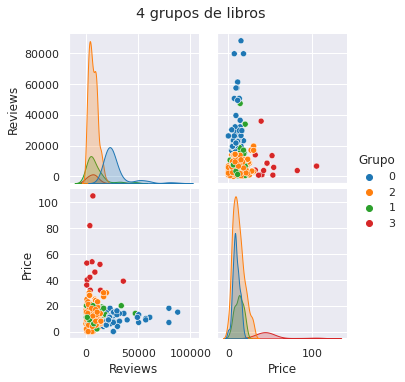

In [23]:
# Grafica los grupos con un pairplot y con un scatterplot en 3D 
# (si es necesario). Analiza las características de cada grupo.
sns.pairplot(data=relevantes, hue='Grupo', palette='tab10')
plt.suptitle('4 grupos de libros', y=1.05)